In [1]:
from collections import Counter
import pprint


## Read File in

In [2]:
!ls  #访谈记录.txt

simsun.ttf	   stopword.txt  分词01.ipynb
single_word.ipynb  访谈记录.txt  分词&彩色词云.ipynb


In [3]:
filename = "data/访谈记录.txt"
with open(filename) as f:
 mytext = f.read()

#print(mytext)

## Break words with Jieba

In [5]:
import jieba
mytext = " ".join(jieba.cut(mytext))

#print(mytext)

In [6]:
counter = Counter(mytext)
pprint.pprint(counter.most_common(10))

[(' ', 29734),
 ('，', 666),
 ('是', 500),
 ('的', 413),
 ('。', 347),
 ('个', 334),
 ('就', 328),
 ('\n', 312),
 ('角', 309),
 ('色', 308)]


## Break with PKUSEG

In [8]:
import pkuseg
from collections import Counter
import pprint

content = []
with open("data/访谈记录.txt", encoding="utf-8") as f:
    content = f.read()

lexicon = ['吃','带','角色1','角色2','角色3','角色4','角色5','角色6','角色7','角色8','角色9','角色10','角色11','角色12','角色13','角色14']  #
seg = pkuseg.pkuseg(user_dict=lexicon)  # 加载模型，给定用户词典
text = seg.cut(content)

stopwords = []

with open("stopword.txt", encoding="utf-8") as f:
    stopwords = f.read()

new_text = []

for w in text:
    if w not in stopwords:
        new_text.append(w)

counter = Counter(new_text)
pprint.pprint(counter.most_common(50))



[('医院', 40),
 ('科', 35),
 ('老师', 31),
 ('培训', 29),
 ('住院', 26),
 ('科室', 25),
 ('护士', 23),
 ('吃', 21),
 ('轮转', 20),
 ('带', 19),
 ('大夫', 16),
 ('工作', 15),
 ('希望', 14),
 ('科里', 14),
 ('时间', 13),
 ('入职', 13),
 ('开通', 13),
 ('内科', 12),
 ('班', 11),
 ('里边', 11),
 ('找', 11),
 ('安排', 10),
 ('规培', 10),
 ('发展', 9),
 ('交流', 9),
 ('员工', 9),
 ('内容', 9),
 ('阶段', 9),
 ('医生', 9),
 ('收入', 9),
 ('协和', 8),
 ('名字', 8),
 ('系统', 8),
 ('中级', 8),
 ('参加', 7),
 ('那种', 7),
 ('关心', 7),
 ('教', 7),
 ('定科', 7),
 ('护理部', 7),
 ('饭', 7),
 ('职业', 6),
 ('解决', 6),
 ('外科', 6),
 ('关键', 6),
 ('熟悉', 6),
 ('护理', 6),
 ('去年', 6),
 ('专业', 6),
 ('权限', 6)]


In [9]:
print(type(new_text))

<class 'list'>


In [13]:
#str(new_text)

## Make word cloud

In [17]:
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 99.5, -0.5)

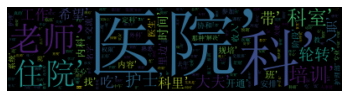

In [14]:
from wordcloud import WordCloud
wordcloud = WordCloud(font_path="simsun.ttf"
                      ,width=400
                      ,height=100
                     ).generate(str(new_text))
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

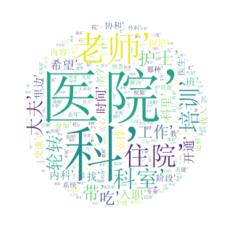

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)


wc = WordCloud(font_path="simsun.ttf", background_color="white", repeat=True, mask=mask)
wc.generate(str(new_text))

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()